# Hotel Booking Cancellation Analysis Based on European Tourists

## 1. Introduction

In current days, the rapid development of the tourism industry leads to an increase in hotel demands. However, as the market expands rapidly, more problems appear at the same time. Situations, like overbooking, inappropriate operation, and etc, affect customer life-value and therefore might cause a loss on revenue. The main purpose of this project is to focus on identifying factors related to cancellation and build a prediction model to determine whether the hotel order will be cancelled. 

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import plotly.express as px
import plotly.graph_objects as go

from datetime import date
import holidays
import calendar

# tackle the country ISO code
import awoc

# model package
from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.metrics import accuracy_score,f1_score
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc

from sklearn import preprocessing


from sklearn.metrics import classification_report
from sklearn import metrics


from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier

from sklearn.model_selection import train_test_split, KFold, cross_validate, cross_val_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

## 2. Database

The dataset applied in this project,  [“Hotel Booking Demand Dataset”](https://www.kaggle.com/jessemostipak/hotel-booking-demand), is an open dataset from Kaggle and originated from the article [Hotel Booking Demand Datasets (Nuno Antonio, Ana Almeida, and Luis Nunes 2019)](https://www.sciencedirect.com/science/article/pii/S2352340918315191). 




In [3]:
# Read hotel_bookings.csv file into a pandas dataframe
HB = pd.read_csv("hotel_bookings.csv")
HB.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [4]:
# Create a new dataframe for analysis
df = HB.copy()
df

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.00,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.00,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.00,0,1,Check-Out,2015-07-03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,City Hotel,0,23,2017,August,35,30,2,5,2,...,No Deposit,394.0,NaN,0,Transient,96.14,0,0,Check-Out,2017-09-06
119386,City Hotel,0,102,2017,August,35,31,2,5,3,...,No Deposit,9.0,NaN,0,Transient,225.43,0,2,Check-Out,2017-09-07
119387,City Hotel,0,34,2017,August,35,31,2,5,2,...,No Deposit,9.0,NaN,0,Transient,157.71,0,4,Check-Out,2017-09-07
119388,City Hotel,0,109,2017,August,35,31,2,5,2,...,No Deposit,89.0,NaN,0,Transient,104.40,0,0,Check-Out,2017-09-07


In [5]:
def holidays_if(year, month, day, country):
    if month.isalpha():
        month = list(calendar.month_name).index(month)
    return(date(year, month, day) in  holidays.CountryHoliday(country)) 

df['holidays'] = df.apply(lambda x:date(x['arrival_date_year'], list(calendar.month_name).index(x['arrival_date_month']), 
                                        x['arrival_date_day_of_month']) in holidays.CountryHoliday(df['country'][0]),axis= 1) 

In [6]:
df1 = df.drop(['arrival_date_week_number',
               'reservation_status_date','previous_bookings_not_canceled','company',
              'agent'], axis = 1)
df1.head()
len(df1)

119390

## 3. Data Pre-processing

### i. Clean Missing Value

Maintaining the data consistency and accurancy is essential for further analysis. Thus, the data pre-processing process is applied before the analysis. We first checked whether there are missing value in the dataset. If there are, we woulde remove it. 

In [7]:
# check missing values
df1.isna().sum()

hotel                            0
is_canceled                      0
lead_time                        0
arrival_date_year                0
arrival_date_month               0
arrival_date_day_of_month        0
stays_in_weekend_nights          0
stays_in_week_nights             0
adults                           0
children                         4
babies                           0
meal                             0
country                        488
market_segment                   0
distribution_channel             0
is_repeated_guest                0
previous_cancellations           0
reserved_room_type               0
assigned_room_type               0
booking_changes                  0
deposit_type                     0
days_in_waiting_list             0
customer_type                    0
adr                              0
required_car_parking_spaces      0
total_of_special_requests        0
reservation_status               0
holidays                         0
dtype: int64

In [8]:
df1 = df1.dropna()
df1.isna().sum()

hotel                          0
is_canceled                    0
lead_time                      0
arrival_date_year              0
arrival_date_month             0
arrival_date_day_of_month      0
stays_in_weekend_nights        0
stays_in_week_nights           0
adults                         0
children                       0
babies                         0
meal                           0
country                        0
market_segment                 0
distribution_channel           0
is_repeated_guest              0
previous_cancellations         0
reserved_room_type             0
assigned_room_type             0
booking_changes                0
deposit_type                   0
days_in_waiting_list           0
customer_type                  0
adr                            0
required_car_parking_spaces    0
total_of_special_requests      0
reservation_status             0
holidays                       0
dtype: int64

### ii: Remove Outlier

Generally, the outliers would be the values which are far from the mean. However, in hotel industry, the outliers are hard to define. Based on the dependent variables in this project is Is_cancelled, the following two circumstanses would be defined as the outliers in this project. First, the circumstances， which the researvation_status shows "No-show" but Is_cancelled shows "No"，is not useful for the cancellation analysis. Second, based on commom sense, the hotel booking and check in process should be completed by adults. Thus, if the orders show no adult, which the "adult" attribute equal to 0, we consider these order must made by mistake and remove them. 

In [9]:
df2 = df1.copy()

# Remove No-Show
df2 = df2[df2['reservation_status'] != 'No-Show']

# Remove Adults = 0
df2 = df2[df2['adults'] != 0]


## 4. Data Description: 

The original dataset contains 32 attributes and 119,390 observations, and mainly describes the business information for city hotels and resort hotels, such as booking date, length of stay, traveller’s nation, and etc. The dependent variable is Is_canceled, and the rest of the attributes are independent variables. 

Based on research and literature review, 22 attributes are selected for further analysis. in addition, for further analysis, we divided the attributes into two groups based on their datatypes. The numerical attributes are num_features = "lead_time","stays_in_weekend_nights","stays_in_week_nights","adults","children","babies","is_repeated_guest", "previous_cancellations","required_car_parking_spaces", "total_of_special_requests", "adr". And categorical features are cat_features = "is_canceled","hotel","arrival_date_year","arrival_date_month","arrival_date_day_of_month","meal","market_segment","distribution_channel","reserved_room_type","deposit_type","customer_type","holidays". 

And here is the description of selected columns and the Statistical description of columns by type are shown in the appendix.


In [10]:
# check variables' types
df1.dtypes

hotel                           object
is_canceled                      int64
lead_time                        int64
arrival_date_year                int64
arrival_date_month              object
arrival_date_day_of_month        int64
stays_in_weekend_nights          int64
stays_in_week_nights             int64
adults                           int64
children                       float64
babies                           int64
meal                            object
country                         object
market_segment                  object
distribution_channel            object
is_repeated_guest                int64
previous_cancellations           int64
reserved_room_type              object
assigned_room_type              object
booking_changes                  int64
deposit_type                    object
days_in_waiting_list             int64
customer_type                   object
adr                            float64
required_car_parking_spaces      int64
total_of_special_requests

In [11]:
num_col = df1[['is_canceled','lead_time','days_in_waiting_list','stays_in_weekend_nights','stays_in_week_nights','adr','adults','children',
               'babies','is_repeated_guest','booking_changes','days_in_waiting_list','required_car_parking_spaces','previous_cancellations',
              'total_of_special_requests']]
cat_col = df1[['arrival_date_month','hotel','deposit_type','country','meal', 'market_segment','customer_type',
               'reservation_status','distribution_channel','reserved_room_type','assigned_room_type']]
num_col.describe()

,is_canceled,lead_time,days_in_waiting_list,stays_in_weekend_nights,stays_in_week_nights,adr,adults,children,babies,is_repeated_guest,booking_changes,days_in_waiting_list,required_car_parking_spaces,previous_cancellations,total_of_special_requests
count,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000,118898.000000
mean,0.371352,104.311435,2.330754,0.928897,2.502145,102.003243,1.858391,0.104207,0.007948,0.032011,0.221181,2.330754,0.061885,0.087142,0.571683
std,0.483168,106.903309,17.630452,0.996216,1.900168,50.485862,0.578576,0.399172,0.097380,0.176029,0.652785,17.630452,0.244172,0.845869,0.792678
min,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,18.000000,0.000000,0.000000,1.000000,70.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,69.000000,0.000000,1.000000,2.000000,95.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,161.000000,0.000000,2.000000,3.000000,126.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,737.000000,391.000000,16.000000,41.000000,5400.000000,55.000000,10.000000,10.000000,1.000000,21.000000,391.000000,8.000000,26.000000,5.000000


In [12]:
cat_col.describe()

,arrival_date_month,hotel,deposit_type,country,meal,market_segment,customer_type,reservation_status,distribution_channel,reserved_room_type,assigned_room_type
count,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898,118898
unique,12,2,3,177,5,7,4,3,5,10,12
top,August,City Hotel,No Deposit,PRT,BB,Online TA,Transient,Check-Out,TA/TO,A,A
freq,13852,79302,104163,48586,91863,56402,89174,74745,97730,85601,73863


## 5. EDA

### i: Tourists Composition Analysis

To determine the tourists composition, the total number of tourists in different countries is calculated and showed in precentage. A pie chart, which focuses on market segment, and A map, which focuses on geographic, would be conduct to represent the composition. 

In [13]:
# get number of acutal guests by country
country_data = pd.DataFrame(df2.loc[df2["is_canceled"] == 0]["country"].value_counts())
#country_data.index.name = "country"
country_data.rename(columns={"country": "Number of Guests"}, inplace=True)
total_guests = country_data["Number of Guests"].sum()
country_data["Guests in %"] = round(country_data["Number of Guests"] / total_guests * 100, 2)
country_data["country"] = country_data.index
#country_data.loc[country_data["Guests in %"] < 2, "country"] = "Other"

country_data

,Number of Guests,Guests in %,country
PRT,20946,28.13,PRT
GBR,9656,12.97,GBR
FRA,8448,11.35,FRA
ESP,6373,8.56,ESP
DEU,6056,8.13,DEU
...,...,...,...
BWA,1,0.00,BWA
SMR,1,0.00,SMR
BFA,1,0.00,BFA
NPL,1,0.00,NPL


In [14]:
my_world = awoc.AWOC()
# Build a dict to store country's name, ISO3 and continent's name
country_info_dict = {}
country_name_lst = my_world.get_countries_list()
for i in country_name_lst:
    country_info_dict[i] = [my_world.get_country_ISO3(i)]
    country_info_dict[i].append( my_world.get_country_continent_name(i))
country_info_dict


def get_country_name_by_ISO3(ISO3: str) -> str:
    for k,v in country_info_dict.items():
        if ISO3 in v[0]:
            return k
    
def get_continent_by_ISO3(ISO3: str) -> str:
    for k,v in country_info_dict.items():
        if ISO3 in v[0]:
            return v[1]

In [15]:
# add continent and country_name to country_data
country_data['continent'] = country_data.country.apply(lambda x: get_continent_by_ISO3(x))
country_data['country_name'] = country_data.country.apply(lambda x: get_country_name_by_ISO3(x))

In [16]:
country_data

,Number of Guests,Guests in %,country,continent,country_name
PRT,20946,28.13,PRT,Europe,Portugal
GBR,9656,12.97,GBR,Europe,United Kingdom
FRA,8448,11.35,FRA,Europe,France
ESP,6373,8.56,ESP,Europe,Spain
DEU,6056,8.13,DEU,Europe,Germany
...,...,...,...,...,...
BWA,1,0.00,BWA,Africa,Botswana
SMR,1,0.00,SMR,Europe,San Marino
BFA,1,0.00,BFA,Africa,Burkina Faso
NPL,1,0.00,NPL,Asia,Nepal


In [17]:
# pie chart for country_data
fig = px.pie(country_data,
             values="Number of Guests",
             names="country_name",
             title="Home country of guests",
             template="seaborn")
fig.update_traces(textposition="inside", textinfo="value+percent+label")
fig.show(renderer = 'browser')

In [19]:
# show country_data on world map
guest_map = px.choropleth(country_data,
                    locations=country_data.index,
                    color=country_data["Guests in %"], 
                    hover_name=country_data.country_name, 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    title="Home country of guests")
guest_map.show(renderer = 'browser')

**Note: these two pictures are to big to show in the Jupyter Lab, so the result has been attached after we did the screen cut.** The result is interactive, and the corresponding information will be displayed when the mouse is moved to the picture. This function is lost after the screenshot is in the image format.

![image.png](https://i.loli.net/2020/08/20/uV8gpdNEvBCPtAR.png)

![1597939194_1_.png](https://i.loli.net/2020/08/21/EmvODI7JcN9Kxjs.png)

From the pie chart, we can see the top ten segments consist of over 90% of the data. They are all European countries. Thus, the focus of the project would be on European tourist. The reason is because other factors, such as holiday, weathers, and preferences, can be controlled and thus maintain the accurancy of the analysis. The map graph is another stronge support for this point. The coloer scale shows that the lighter the color is, the more tourists. In this graph, the European area has the lightest coloer than any other continents. 

In [20]:
# select all country data from Europe
country_info = []
for i in range(len(country_data['country'])):
    if country_data['continent'][i] == 'Europe':
        country_info.append(country_data['country'][i])

# add new column country_area to df2 for further analysis
country_area = []
for i in df2['country']:
    if i in country_info:
        country_area.append('Europe')
    else:
        country_area.append('other')

df2['country_area'] = country_area


In [21]:
# add new column 'with_children' to df2 for further analysis
num_children = []
for i in df2['children']:
    if i > 0:
        num_children.append('With_Children')
    else:
        num_children.append('Adult_Only')

df2['with_children'] = num_children

In [22]:
df3 = df2[df2['country_area'] == 'Europe']
df3.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,holidays,country_area,with_children
0,Resort Hotel,0,342,2015,July,1,0,0,2,0.0,...,No Deposit,0,Transient,0.0,0,0,Check-Out,False,Europe,Adult_Only
1,Resort Hotel,0,737,2015,July,1,0,0,2,0.0,...,No Deposit,0,Transient,0.0,0,0,Check-Out,False,Europe,Adult_Only
2,Resort Hotel,0,7,2015,July,1,0,1,1,0.0,...,No Deposit,0,Transient,75.0,0,0,Check-Out,False,Europe,Adult_Only
3,Resort Hotel,0,13,2015,July,1,0,1,1,0.0,...,No Deposit,0,Transient,75.0,0,0,Check-Out,False,Europe,Adult_Only
4,Resort Hotel,0,14,2015,July,1,0,2,2,0.0,...,No Deposit,0,Transient,98.0,0,1,Check-Out,False,Europe,Adult_Only


### ii: Cancellation Distribution Analysis

The cancellation distribution is based on two aspects: "time" and "customer_types". We first compare the cancellation rate between two hotel types among months. Generally, city hotels are having a higher cancellation rate than resort hotels. The resort hotels have a higher rate at the middle of the year. 

Next, we wonder whehther different types of customers would have different cancellation rate. Thus another graph represents the results of different cancellation rate based on the customer_type x-axis. The types are: "adult" and "adult with children". The results shows that when only adults, the rate of the city hotel is higher than it of the resorts. And when having children together, the rate distribution is opposite. 

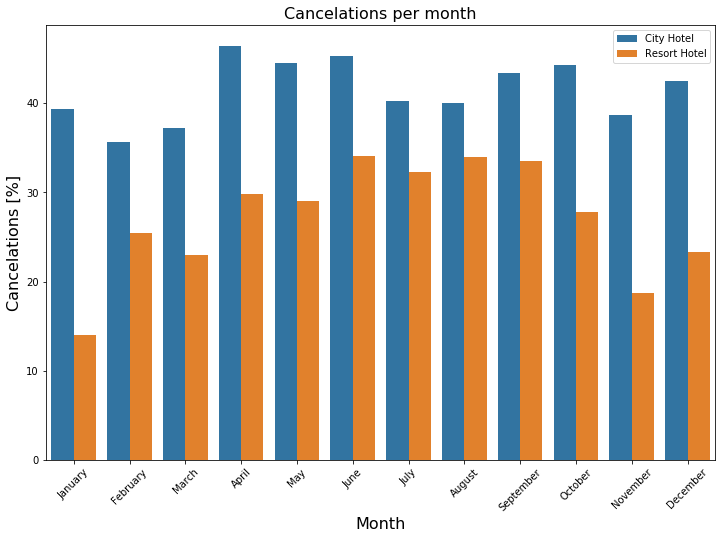

In [23]:
# collect arrival_date_month and cancelation data with two hotel types:
res_book_per_month = df3.loc[(df3["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["hotel"].count()
res_cancel_per_month = df3.loc[(df3["hotel"] == "Resort Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

cty_book_per_month = df3.loc[(df3["hotel"] == "City Hotel")].groupby("arrival_date_month")["hotel"].count()
cty_cancel_per_month = df3.loc[(df3["hotel"] == "City Hotel")].groupby("arrival_date_month")["is_canceled"].sum()

res_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Month": list(res_book_per_month.index),
                                "Bookings": list(res_book_per_month.values),
                                "Cancelations": list(res_cancel_per_month.values)})
cty_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Month": list(cty_book_per_month.index),
                                "Bookings": list(cty_book_per_month.values),
                                "Cancelations": list(cty_cancel_per_month.values)})

full_cancel_data = pd.concat([res_cancel_data, cty_cancel_data], ignore_index=True)
full_cancel_data["cancel_percent"] = full_cancel_data["Cancelations"] / full_cancel_data["Bookings"] * 100

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_cancel_data["Month"] = pd.Categorical(full_cancel_data["Month"], categories=ordered_months, ordered=True)

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Month", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=full_cancel_data)
plt.title("Cancelations per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()

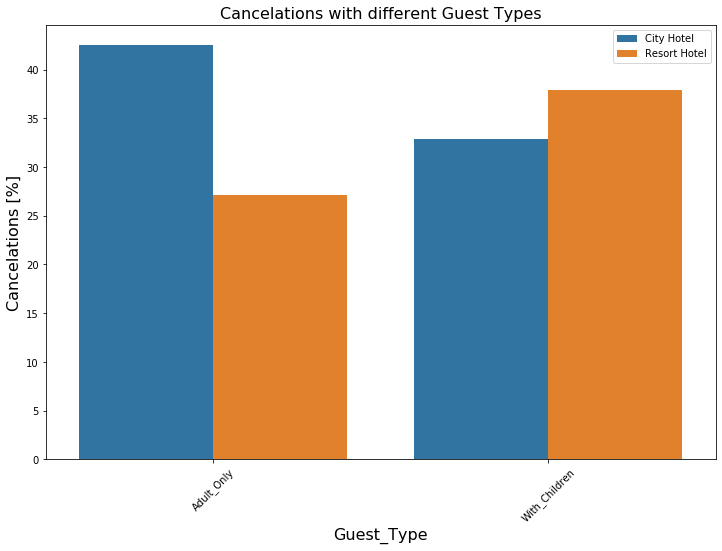

In [24]:
# collect with_children and cancelation with two hotel types:
res_book_guest = df3.loc[(df3["hotel"] == "Resort Hotel")].groupby("with_children")["hotel"].count()
res_cancel_guest = df3.loc[(df3["hotel"] == "Resort Hotel")].groupby("with_children")["is_canceled"].sum()

cty_book_guest = df3.loc[(df3["hotel"] == "City Hotel")].groupby("with_children")["hotel"].count()
cty_cancel_guest = df3.loc[(df3["hotel"] == "City Hotel")].groupby("with_children")["is_canceled"].sum()

RH_cancel_data = pd.DataFrame({"Hotel": "Resort Hotel",
                                "Guest": list(res_book_guest.index),
                                "Bookings": list(res_book_guest.values),
                                "Cancelations": list(res_cancel_guest.values)})
CH_cancel_data = pd.DataFrame({"Hotel": "City Hotel",
                                "Guest": list(cty_book_guest.index),
                                "Bookings": list(cty_book_guest.values),
                                "Cancelations": list(cty_cancel_guest.values)})

Cancel_data = pd.concat([RH_cancel_data, CH_cancel_data], ignore_index=True)
Cancel_data["cancel_percent"] = Cancel_data["Cancelations"] / Cancel_data["Bookings"] * 100

# order by month:
Guest_type = ["Adult_Only", "With_Children"]
Cancel_data["Guest"] = pd.Categorical(Cancel_data["Guest"], categories=Guest_type)

# show figure:
plt.figure(figsize=(12, 8))
sns.barplot(x = "Guest", y = "cancel_percent" , hue="Hotel",
            hue_order = ["City Hotel", "Resort Hotel"], data=Cancel_data)
plt.title("Cancelations with different Guest Types", fontsize=16)
plt.xlabel("Guest_Type", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Cancelations [%]", fontsize=16)
plt.legend(loc="upper right")
plt.show()


### iii: Room Price Trends Per Person

For the price aspects, the shadow represents the price range of each hotel type. The widths of both types has no significant difference.This clearly shows that the prices in the Resort hotel are much higher during the summer. The price of the city hotel varies less and is most expensive during spring and autumn.

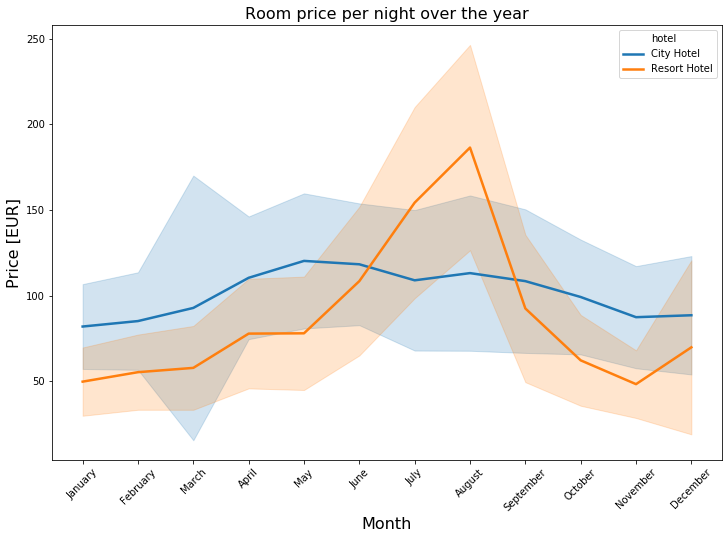

In [25]:
# grab data:
room_prices_mothly = df3[["hotel", "arrival_date_month", "adr"]].sort_values("arrival_date_month")

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
room_prices_mothly["arrival_date_month"] = pd.Categorical(room_prices_mothly["arrival_date_month"], categories=ordered_months, ordered=True)

# barplot with standard deviation:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "arrival_date_month", y="adr", hue="hotel", data=room_prices_mothly, 
            hue_order = ["City Hotel", "Resort Hotel"], ci="sd", size="hotel", sizes=(2.5, 2.5))
plt.title("Room price per night over the year", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Price [EUR]", fontsize=16)
plt.show()

### iv: Tourist Volume based on Months

First, There is a large difference between the volume of city hotels and resort hotels. It is because the number of the city hotel in this dataset is almost twice than the resort hotel. 

Second, the City hotel has more guests during spring and autumn, when the prices are also highest. In July and August there are less visitors, although prices are lower. Guest numbers for the Resort hotel go down slighty from June to September, which is also when the prices are highest.Both hotels have the fewest guests during the winter.

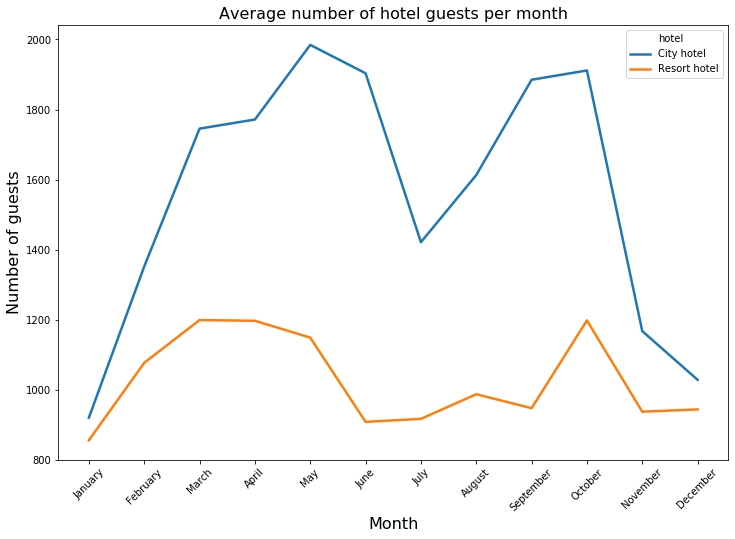

In [26]:
# collect all not canceled bookings with two hotel types:
resort = df3.loc[(df3["hotel"] == "Resort Hotel") & (df3["is_canceled"] == 0)]
city = df3.loc[(df3["hotel"] == "City Hotel") & (df3["is_canceled"] == 0)]

# Create a DateFrame with the relevant data:
resort_guests_monthly = resort.groupby("arrival_date_month")["hotel"].count()
city_guests_monthly = city.groupby("arrival_date_month")["hotel"].count()

resort_guest_data = pd.DataFrame({"month": list(resort_guests_monthly.index),
                    "hotel": "Resort hotel", 
                    "guests": list(resort_guests_monthly.values)})

city_guest_data = pd.DataFrame({"month": list(city_guests_monthly.index),
                    "hotel": "City hotel", 
                    "guests": list(city_guests_monthly.values)})
full_guest_data = pd.concat([resort_guest_data,city_guest_data], ignore_index=True)

# order by month:
ordered_months = ["January", "February", "March", "April", "May", "June", 
          "July", "August", "September", "October", "November", "December"]
full_guest_data["month"] = pd.Categorical(full_guest_data["month"], categories=ordered_months, ordered=True)

# Dataset contains July and August date from 3 years, the other month from 2 years. Normalize data:
full_guest_data.loc[(full_guest_data["month"] == "July") | (full_guest_data["month"] == "August"),
                    "guests"] /= 3
full_guest_data.loc[~((full_guest_data["month"] == "July") | (full_guest_data["month"] == "August")),
                    "guests"] /= 2

#show figure:
plt.figure(figsize=(12, 8))
sns.lineplot(x = "month", y="guests", hue="hotel", data=full_guest_data, 
             hue_order = ["City hotel", "Resort hotel"], size="hotel", sizes=(2.5, 2.5))
plt.title("Average number of hotel guests per month", fontsize=16)
plt.xlabel("Month", fontsize=16)
plt.xticks(rotation=45)
plt.ylabel("Number of guests", fontsize=16)
plt.show()

# 6. Feature Selection: 
The regression estimation is inaccurate due to the high correlation between the variables. Hence, we conduct a  Heatmap to check highly correlated variables. Then we develop a decision tree model to calculate the importance of each factors to help us choose important features 
for further analysis.

In [27]:
df4 = df3.copy()

In [28]:
# Assign variables to levels
df4['hotel'] = df4['hotel'].map({'Resort Hotel':0, 'City Hotel':1})

df4['arrival_date_month'] = df4['arrival_date_month'].map({'January':1, 'February': 2, 'March':3, 'April':4, 'May':5, 'June':6, 'July':7,
                                                            'August':8, 'September':9, 'October':10, 'November':11, 'December':12})

df4.head()

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,children,...,deposit_type,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,holidays,country_area,with_children
0,0,0,342,2015,7,1,0,0,2,0.0,...,No Deposit,0,Transient,0.0,0,0,Check-Out,False,Europe,Adult_Only
1,0,0,737,2015,7,1,0,0,2,0.0,...,No Deposit,0,Transient,0.0,0,0,Check-Out,False,Europe,Adult_Only
2,0,0,7,2015,7,1,0,1,1,0.0,...,No Deposit,0,Transient,75.0,0,0,Check-Out,False,Europe,Adult_Only
3,0,0,13,2015,7,1,0,1,1,0.0,...,No Deposit,0,Transient,75.0,0,0,Check-Out,False,Europe,Adult_Only
4,0,0,14,2015,7,1,0,2,2,0.0,...,No Deposit,0,Transient,98.0,0,1,Check-Out,False,Europe,Adult_Only


Firstly, we conduct the **One Hot Encoding** on all the categorcial variables.

One hot encoding is a machines learning encoding method which is able to transfer the categorical variables into numrical variables for the convenience of calculation and analysis. 

In one hot encoding, all the classes in the categorical features are been recorded as binary. For instance, if we have three classes Canada, China, US, they can be denoted as 000, 001, 010 respectively after we applying the one hot encoding.

In [29]:
def labelencode(df):
    le = LabelEncoder()
    return df.apply(le.fit_transform)

def onehotencode(df):
    onehot = OneHotEncoder()
    return onehot.fit_transform(df).toarray()

num_features = ["lead_time",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]

cat_features = ["is_canceled","hotel","arrival_date_year","arrival_date_month","arrival_date_day_of_month","meal","market_segment",
                "distribution_channel","reserved_room_type","deposit_type","customer_type","holidays"]

X_2 = labelencode(df4[cat_features])
onehotlabels = onehotencode(X_2)

In [30]:
df4_oh = pd.concat([df4[num_features], X_2], axis=1)
df4_oh.isna().sum()
df4_oh = df4_oh.dropna()
df4_oh

,lead_time,stays_in_weekend_nights,stays_in_week_nights,adults,children,babies,is_repeated_guest,previous_cancellations,required_car_parking_spaces,total_of_special_requests,...,arrival_date_year,arrival_date_month,arrival_date_day_of_month,meal,market_segment,distribution_channel,reserved_room_type,deposit_type,customer_type,holidays
0,342,0,0,2,0.0,0,0,0,0,0,...,0,6,0,0,3,1,2,0,2,0
1,737,0,0,2,0.0,0,0,0,0,0,...,0,6,0,0,3,1,2,0,2,0
2,7,0,1,1,0.0,0,0,0,0,0,...,0,6,0,0,3,1,0,0,2,0
3,13,0,1,1,0.0,0,0,0,0,0,...,0,6,0,0,2,0,0,0,2,0
4,14,0,2,2,0.0,0,0,0,0,1,...,0,6,0,0,6,3,0,0,2,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
119385,23,2,5,2,0.0,0,0,0,0,0,...,2,7,29,0,5,3,0,0,2,0
119386,102,2,5,3,0.0,0,0,0,0,2,...,2,7,30,0,6,3,4,0,2,0
119387,34,2,5,2,0.0,0,0,0,0,4,...,2,7,30,0,6,3,3,0,2,0
119388,109,2,5,2,0.0,0,0,0,0,0,...,2,7,30,0,6,3,0,0,2,0


In [31]:
df_fs = df4_oh.copy()

Then we used a heatmap to visualize the correlations between all independent variables.

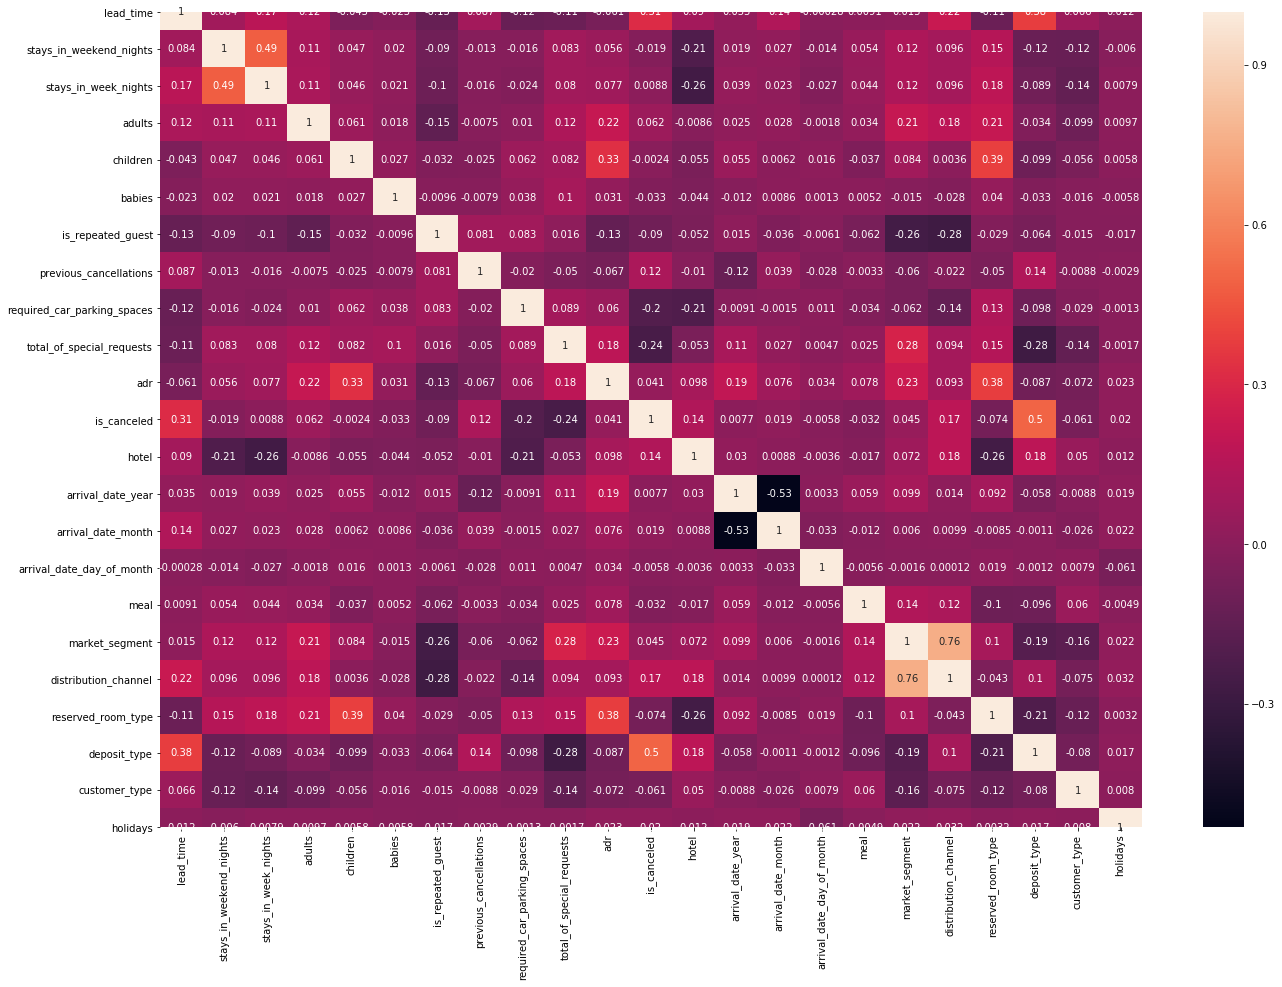

In [32]:
# create a heatmap to check correlations 
fig, ax = plt.subplots(figsize=(22,15))
sns.heatmap(df_fs.corr(), annot=True, ax=ax);

From the heatmap, the correlation between ‘Market Segment’ and ‘DIstribution Channels’ is 0.76, indicating that these two features are highly correlated. Thus, ‘Distribution Channels’ was removed for further analysis.


In the next step, we conduct the importance analysis through decision tree algorithm to select features.

In [33]:
y = df4_oh["is_canceled"]
X = df4_oh.drop(["is_canceled"], axis=1)

# split the dataset
x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)


num_features = ["lead_time",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]
cat_features = ["hotel","arrival_date_month","meal","market_segment",
                "reserved_room_type","deposit_type","customer_type","holidays"]

#cat_features = ["hotel","arrival_date_month"]

# define training set and test set                
x_train = x_train[num_features + cat_features].copy()
x_test = x_test[num_features + cat_features].copy()

num_transformer = SimpleImputer(strategy="constant")


cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features),
                                               ('cat', cat_transformer, cat_features)])

In [34]:
# conduct a decision tree model
cart = DecisionTreeClassifier(max_depth = 12)
cart_model = cart.fit(x_train, y_train)
y_pred = cart_model.predict(x_test)
print('Decision Tree Model')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred), roc_auc_score(y_test,y_pred)))

Decision Tree Model
Accuracy Score: 0.8310308581725355

Confusion Matrix:
 [[15444  1287]
 [ 3214  6693]]

AUC Score: 0.7993299221218874


Text(0.5, 0, 'Feature Importances for Total Observations(%)')

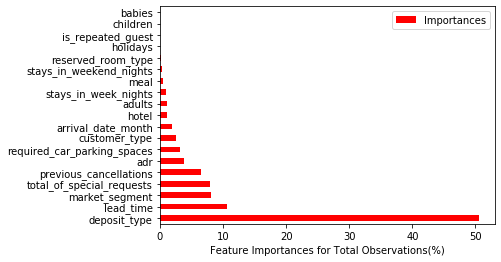

In [35]:
# plot the importance of features
pd.DataFrame(data = cart_model.feature_importances_*100,
                   columns = ["Importances"],
                   index = x_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances for Total Observations(%)")

The higher the value the more important the feature. 

The result shows that **deposit_type** is the most important feature whereas **lead_time**, **market segment**, **total special requests** come after it. Some features like **babies**, **children**, their feature importance value are 0, which means that these factors do not appear when built decision tree. 

Finally, top ten factors of importance are selected to build models.


# 7. Model Building

In this part, several models were chosen for perdicting whether visiters will cancel the hotel booking.

The entire dataset was splited into two subsets, training set (75%) and test set (25%).

In [36]:
y = df4["is_canceled"]
X = df4.drop(["is_canceled"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)


#num_features = ["lead_time",
                #"stays_in_weekend_nights","stays_in_week_nights","adults","children",
                #"babies","is_repeated_guest", "previous_cancellations",
                #"required_car_parking_spaces", "total_of_special_requests", "adr"]

#cat_features = ["hotel","arrival_date_month","meal","market_segment",
                #"distribution_channel","reserved_room_type","deposit_type","customer_type"]

num_features = ["lead_time", "previous_cancellations","required_car_parking_spaces","total_of_special_requests","adr"]

cat_features = ["hotel","arrival_date_month","market_segment","deposit_type","customer_type"]


x_train = x_train[num_features + cat_features].copy()
x_test = x_test[num_features + cat_features].copy()

num_transformer = SimpleImputer(strategy="constant")


cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features),
                                               ('cat', cat_transformer, cat_features)])

In [40]:
from xgboost import XGBClassifier

# Conduct XGBoost
model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=1000, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005,random_state=101)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

alg_model = pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)

y_prob = pipeline.predict_proba(x_test)[:,1]

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.93      0.89     16731
           1       0.85      0.72      0.78      9907

    accuracy                           0.85     26638
   macro avg       0.85      0.82      0.83     26638
weighted avg       0.85      0.85      0.85     26638



Then, for the KNN algorithm, we need to find the best K to guarantee the best classification performance. We check the test error for each different K and find the k value which can minimize the test error.

In [41]:
error = []
y_knn = df4_oh["is_canceled"]
X_knn = df4_oh.drop(["is_canceled"], axis=1)

x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn,test_size=0.25, random_state=0)


num_features = ["lead_time", "previous_cancellations","required_car_parking_spaces","total_of_special_requests","adr"]

cat_features = ["hotel","arrival_date_month","market_segment","deposit_type","customer_type"]

x_train_knn = x_train_knn[num_features + cat_features].copy()
x_test_knn = x_test_knn[num_features + cat_features].copy()

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_knn, y_train_knn)
    pred_i = knn.predict(x_test_knn)
    error.append(np.mean(pred_i != y_test_knn))

Text(0, 0.5, 'Mean Error')

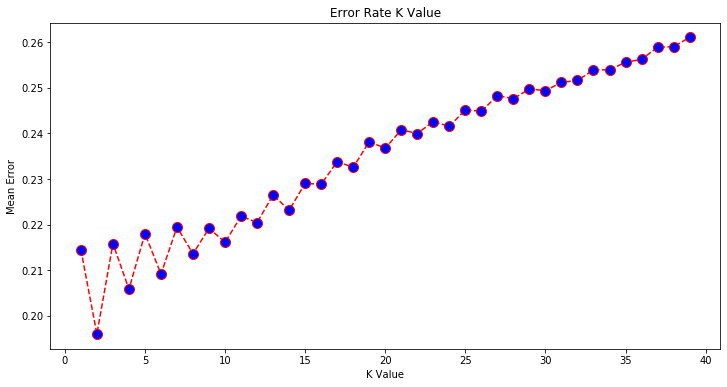

In [106]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the result, we can notice that when k eauqls to 2, the KNN can have the best performance (minimum the test error rate). 

In [108]:
# Conduct KNN 
model = KNeighborsClassifier(n_neighbors=2,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski')
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     16731
           1       0.83      0.60      0.69      9907

    accuracy                           0.80     26638
   macro avg       0.81      0.76      0.78     26638
weighted avg       0.81      0.80      0.80     26638



In [48]:
# Conduct Decision Tree
model = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

pipeline.fit(x_train, y_train)


predictions = pipeline.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86     16731
           1       0.77      0.76      0.77      9907

    accuracy                           0.83     26638
   macro avg       0.82      0.81      0.82     26638
weighted avg       0.83      0.83      0.83     26638



In [49]:
# Conduct Random Forest
model = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.90      0.88     16731
           1       0.82      0.76      0.79      9907

    accuracy                           0.85     26638
   macro avg       0.84      0.83      0.84     26638
weighted avg       0.85      0.85      0.85     26638



In [51]:
# Conduct AdaBoost
model = AdaBoostClassifier(base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

pipeline.fit(x_train, y_train)


predictions = pipeline.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87     16731
           1       0.84      0.63      0.72      9907

    accuracy                           0.82     26638
   macro avg       0.83      0.78      0.79     26638
weighted avg       0.82      0.82      0.81     26638



The following table shows the results summerizing the value of performance index of each algorithem:


|   | KNN | DT | RF | AdaBoost | XGBoost |
| :--: | :--: | :--: | :--: | :--: | :--: |
| Accuracy | 0.80 | 0.83 | 0.85 | 0.85 | 0.85 |
| Precision | 0.83 | 0.77 | 0.82 | 0.84 | 0.85 |
| Recall | 0.60 | 0.76 | 0.76 | 0.63 | 0.72 |
| F1 Score | 0.69 | 0.77 | 0.79 | 0.72 | 0.78 |

For the entire dataset, 
Accuracy is a description of systematic error, in this context, it is calculated by dividing the number of bookings whose outcomes were correctly predicted by the total number of bookings.

Recall is considered a description of random error, it is calculated by dividing the number of bookings that were predicted as "likely to cancel".For example, there are 1000 bookings were cancelled in the dataset, and we retrieved 800 cancelled orders, the recall rate is 80%.

So in this table, we noticed that random forest and XGBoost perform better than others because they have higher accuracy. In addition, the F1-Score of these two models are higher as well. Furthermore, since we focused on whether the customer cancel the order, we need to focus on the recalls. In Random Forest, the recall is 0.76, which means around 76% cancelled orders are retrieved. Similarly, in XGBoost model, around 72% cancel orders are retrieved.


## 8. Model opitimization

### i. by different hotel types

Created the subset from the orignical dataset by the hotel type.

In [39]:
df4_C_oh = df4_oh.copy()
df4_R_oh = df4_oh.copy()

df4_C_oh = df4_C_oh.loc[df4_C_oh['hotel'] == 1]
df4_R_oh = df4_R_oh.loc[df4_R_oh['hotel'] == 0]

In [40]:
df4_C = df4.copy()
df4_R = df4.copy()

df4_C = df4_C.loc[df4_C['hotel'] == 1]
df4_R = df4_R.loc[df4_R['hotel'] == 0]

#### 1) For city hotel

Did the feature selection and used different models on the **city hotel** data set.

Decision Tree Model
Accuracy Score: 0.8398989318938785

Confusion Matrix:
 [[9211  955]
 [1833 5415]]

AUC Score: 0.8265810313693354


Text(0.5, 0, 'Feature Importances for City Hotel(%)')

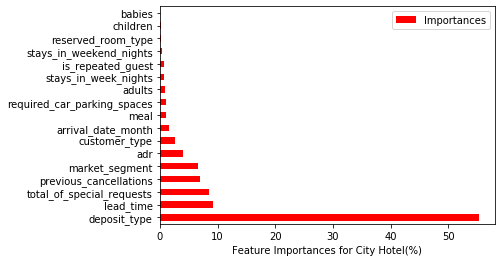

In [41]:
y = df4_C_oh["is_canceled"]
X = df4_C_oh.drop(["is_canceled"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

num_features = ["lead_time",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]
cat_features = ["arrival_date_month","meal","market_segment",
                "reserved_room_type","deposit_type","customer_type"]

x_train = x_train[num_features + cat_features].copy()
x_test = x_test[num_features + cat_features].copy()

cart = DecisionTreeClassifier(max_depth = 12)
cart_model = cart.fit(x_train, y_train)
y_pred = cart_model.predict(x_test)
print('Decision Tree Model')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred), roc_auc_score(y_test,y_pred)))

pd.DataFrame(data = cart_model.feature_importances_*100,
                   columns = ["Importances"],
                   index = x_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances for City Hotel(%)")

The result with City Hotel data shows that deposit_type is the most important feature whereas lead time, total special requests, market segment and previous cancellations come after it. Some features like babies, children, their feature importance value are 0, which means that these factors do not appear when built decision tree. 

Finally, top ten factors of importance are selected to build models.


In [125]:
y = df4_C["is_canceled"]
X = df4_C.drop(["is_canceled","country_area"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)


num_features = ["lead_time","previous_cancellations",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]
cat_features = ["deposit_type","customer_type","arrival_date_month","meal","market_segment"]

x_train = x_train[num_features + cat_features].copy()
x_test = x_test[num_features + cat_features].copy()

num_transformer = SimpleImputer(strategy="constant")


cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features),
                                               ('cat', cat_transformer, cat_features)])


In [76]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=1000, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005,random_state=101)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

alg_model = pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)

y_prob = pipeline.predict_proba(x_test)[:,1]

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.91      0.88     10166
           1       0.87      0.78      0.82      7248

    accuracy                           0.86     17414
   macro avg       0.86      0.85      0.85     17414
weighted avg       0.86      0.86      0.86     17414



In [114]:
error = []
y_knn = df4_C_oh["is_canceled"]
X_knn = df4_C_oh.drop(["is_canceled"], axis=1)

x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn,test_size=0.25, random_state=0)


num_features = ["lead_time","previous_cancellations",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]
cat_features = ["deposit_type","customer_type","arrival_date_month","meal","market_segment"]

x_train_knn = x_train_knn[num_features + cat_features].copy()
x_test_knn = x_test_knn[num_features + cat_features].copy()

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_knn, y_train_knn)
    pred_i = knn.predict(x_test_knn)
    error.append(np.mean(pred_i != y_test_knn))

Text(0, 0.5, 'Mean Error')

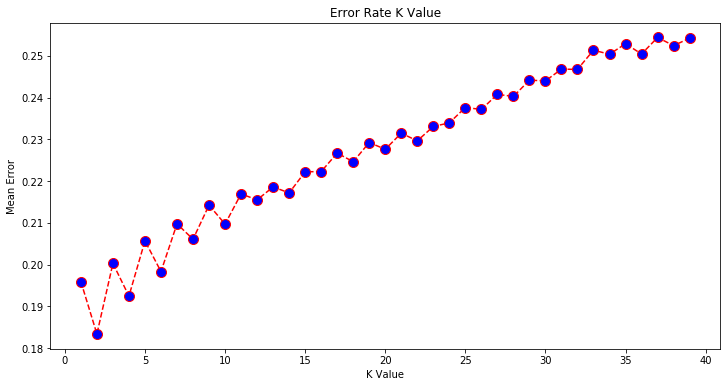

In [115]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the result, we can notice that when k eauqls to 2, the KNN can have the best performance (minimum the test error rate). 

In [126]:
model = KNeighborsClassifier(n_neighbors=2,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski')
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.79      0.93      0.86     10166
           1       0.87      0.66      0.75      7248

    accuracy                           0.82     17414
   macro avg       0.83      0.80      0.80     17414
weighted avg       0.83      0.82      0.81     17414



In [78]:
model = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

pipeline.fit(x_train, y_train)


predictions = pipeline.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.85      0.86     10166
           1       0.80      0.81      0.80      7248

    accuracy                           0.83     17414
   macro avg       0.83      0.83      0.83     17414
weighted avg       0.83      0.83      0.83     17414



In [79]:
model = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88     10166
           1       0.85      0.81      0.83      7248

    accuracy                           0.86     17414
   macro avg       0.86      0.85      0.86     17414
weighted avg       0.86      0.86      0.86     17414



In [81]:
model = AdaBoostClassifier(base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

pipeline.fit(x_train, y_train)


predictions = pipeline.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.92      0.86     10166
           1       0.86      0.70      0.77      7248

    accuracy                           0.83     17414
   macro avg       0.83      0.81      0.82     17414
weighted avg       0.83      0.83      0.82     17414



The following table shows the results summerizing the value of performance index of each algorithem:


|   | KNN | DT | RF | AdaBoost | XGBoost |
| :--: | :--: | :--: | :--: | :--: | :--: |
| Accuracy |0.82|0.83|0.86|0.83|0.86|
| Precision |0.87|0.80|0.8|0.86|0.87|
| Recall |0.66|0.81|0.81|0.70|0.78|
| F1 Score | 0.75|0.80|0.83|0.77|0.82 |

Overall, the models perform better with the data based on the city hotel. We noticed that random forest and XGBoost perform better than others because they have higher accuracy. In addition, the F1-Score of these two models are higher as well. Furthermore, in Random Forest, around 81% cancelled orders are retrieved. Similarly, in XGBoost model, around 78% cancel orders are retrieved.

#### 2) For resort hotel

Did the feature selection and used different models on the **resort hotel** data set.

Decision Tree Model
Accuracy Score: 0.8217692974848222

Confusion Matrix:
 [[6162  493]
 [1151 1418]]

AUC Score: 0.7389430530286701


Text(0.5, 0, 'Feature Importances for Resort Hotel(%)')

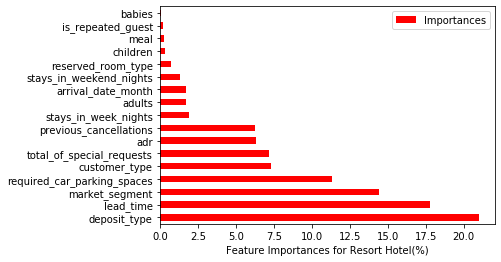

In [42]:
y = df4_R_oh["is_canceled"]
X = df4_R_oh.drop(["is_canceled"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)

num_features = ["lead_time",
                "stays_in_weekend_nights","stays_in_week_nights","adults","children",
                "babies","is_repeated_guest", "previous_cancellations",
                "required_car_parking_spaces", "total_of_special_requests", "adr"]
cat_features = ["arrival_date_month","meal","market_segment",
                "reserved_room_type","deposit_type","customer_type"]

x_train = x_train[num_features + cat_features].copy()
x_test = x_test[num_features + cat_features].copy()

cart = DecisionTreeClassifier(max_depth = 12)
cart_model = cart.fit(x_train, y_train)
y_pred = cart_model.predict(x_test)
print('Decision Tree Model')

print('Accuracy Score: {}\n\nConfusion Matrix:\n {}\n\nAUC Score: {}'
      .format(accuracy_score(y_test,y_pred), confusion_matrix(y_test,y_pred), roc_auc_score(y_test,y_pred)))

pd.DataFrame(data = cart_model.feature_importances_*100,
                   columns = ["Importances"],
                   index = x_train.columns).sort_values("Importances", ascending = False)[:20].plot(kind = "barh", color = "r")

plt.xlabel("Feature Importances for Resort Hotel(%)")

The result with the resort hotel data shows that **deposit_type** is the most important feature whereas **lead_time**, **market segment**, **required car parking spaces** come after it. Almost all feartures show their importance in the model and only the feature **babies**' importance value is 0, which means these factors except appear when built decision tree. 

Finally, top ten factors of importance are selected to build models.

In [123]:
y = df4_R["is_canceled"]
X = df4_R.drop(["is_canceled","country_area"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)


num_features = ["lead_time","previous_cancellations",
                "required_car_parking_spaces", "total_of_special_requests", "adr", "stays_in_week_nights","adults"]
cat_features = ["deposit_type","customer_type","market_segment"]

x_train = x_train[num_features + cat_features].copy()
x_test = x_test[num_features + cat_features].copy()

num_transformer = SimpleImputer(strategy="constant")


cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features),
                                               ('cat', cat_transformer, cat_features)])



In [85]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=1000, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005,random_state=101)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

alg_model = pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)

y_prob = pipeline.predict_proba(x_test)[:,1]

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.92      0.89      6655
           1       0.76      0.64      0.70      2569

    accuracy                           0.84      9224
   macro avg       0.82      0.78      0.80      9224
weighted avg       0.84      0.84      0.84      9224



In [116]:
error = []
y_knn = df4_R_oh["is_canceled"]
X_knn = df4_R_oh.drop(["is_canceled"], axis=1)

x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn,test_size=0.25, random_state=0)


num_features = ["lead_time","previous_cancellations",
                "required_car_parking_spaces", "total_of_special_requests", "adr", "stays_in_week_nights","adults"]
cat_features = ["deposit_type","customer_type","market_segment"]

x_train_knn = x_train_knn[num_features + cat_features].copy()
x_test_knn = x_test_knn[num_features + cat_features].copy()

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_knn, y_train_knn)
    pred_i = knn.predict(x_test_knn)
    error.append(np.mean(pred_i != y_test_knn))

Text(0, 0.5, 'Mean Error')

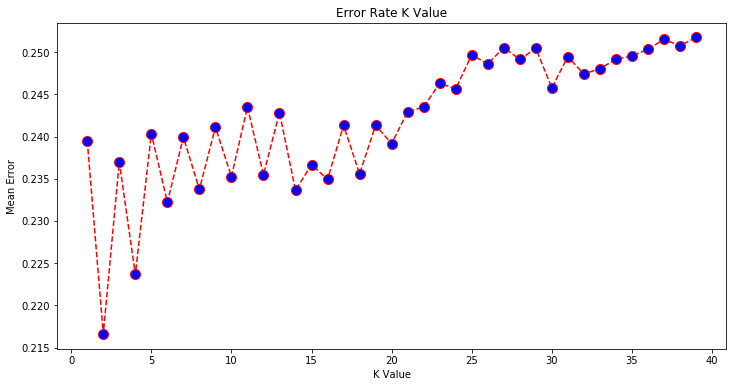

In [117]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the result, we can notice that when k eauqls to 2, the KNN can have the best performance (minimum the test error rate). 

In [124]:
model = KNeighborsClassifier(n_neighbors=2,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski')
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86      6655
           1       0.69      0.40      0.51      2569

    accuracy                           0.78      9224
   macro avg       0.75      0.67      0.69      9224
weighted avg       0.77      0.78      0.76      9224



In [87]:
model = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

pipeline.fit(x_train, y_train)


predictions = pipeline.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.87      0.88      0.88      6655
           1       0.68      0.67      0.67      2569

    accuracy                           0.82      9224
   macro avg       0.78      0.77      0.77      9224
weighted avg       0.82      0.82      0.82      9224



In [88]:
model = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.88      0.92      0.90      6655
           1       0.75      0.67      0.71      2569

    accuracy                           0.85      9224
   macro avg       0.81      0.79      0.80      9224
weighted avg       0.84      0.85      0.84      9224



In [90]:
model = AdaBoostClassifier(base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

pipeline.fit(x_train, y_train)


predictions = pipeline.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.83      0.93      0.88      6655
           1       0.73      0.52      0.61      2569

    accuracy                           0.81      9224
   macro avg       0.78      0.72      0.74      9224
weighted avg       0.81      0.81      0.80      9224



The following table shows the results summerizing the value of performance index of each algorithem:


|   | KNN | DT | RF | AdaBoost | XGBoost |
| :--: | :--: | :--: | :--: | :--: | :--: |
| Accuracy | 0.78 | 0.82 | 0.85 | 0.81 | 0.84 |
| Precision | 0.69 | 0.68 | 0.75 | 0.73 | 0.76 |
| Recall | 0.40 | 0.67 | 0.67 | 0.52 | 0.64 |
| F1 Score | 0.51 | 0.67 | 0.71 | 0.61 | 0.70 |

From the Resort Hotel data, there is no significant improvement in the model with the data based on the resort hotel. We noticed that random forest and XGBoost perform better than others because they have higher accuracy. In addition, the F1-Score of these two models are higher as well. Furthermore, in Random Forest, around 67% cancelled orders are retrieved. Similarly, in XGBoost model, around 64% cancel orders are retrieved.

## ii. Adding New Feature 'Holiday'

In [121]:
y = df4["is_canceled"]
X = df4.drop(["is_canceled"], axis=1)

x_train, x_test, y_train, y_test = train_test_split(X, y,test_size=0.25, random_state=0)


#num_features = ["lead_time",
                #"stays_in_weekend_nights","stays_in_week_nights","adults","children",
                #"babies","is_repeated_guest", "previous_cancellations",
                #"required_car_parking_spaces", "total_of_special_requests", "adr"]

#cat_features = ["hotel","arrival_date_month","meal","market_segment",
                #"distribution_channel","reserved_room_type","deposit_type","customer_type"]

num_features = ["lead_time", "previous_cancellations","required_car_parking_spaces","total_of_special_requests","adr"]

cat_features = ["hotel","arrival_date_month","market_segment","deposit_type","customer_type","holidays"]


x_train = x_train[num_features + cat_features].copy()
x_test = x_test[num_features + cat_features].copy()

num_transformer = SimpleImputer(strategy="constant")


cat_transformer = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="constant", fill_value="Unknown")),
    ("onehot", OneHotEncoder(handle_unknown='ignore'))])


preprocessor = ColumnTransformer(transformers=[('num', num_transformer, num_features),
                                               ('cat', cat_transformer, cat_features)])

In [93]:
from xgboost import XGBClassifier

model = XGBClassifier(max_depth=5, learning_rate=0.1, n_estimators=1000, gamma=0, 
                        min_child_weight=1, subsample=0.8, colsample_bytree=0.8, reg_alpha=0.005,random_state=101)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

alg_model = pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)

y_prob = pipeline.predict_proba(x_test)[:,1]

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.85      0.92      0.88     16731
           1       0.85      0.72      0.78      9907

    accuracy                           0.85     26638
   macro avg       0.85      0.82      0.83     26638
weighted avg       0.85      0.85      0.85     26638



In [118]:
error = []
y_knn = df4_oh["is_canceled"]
X_knn = df4_oh.drop(["is_canceled"], axis=1)

x_train_knn, x_test_knn, y_train_knn, y_test_knn = train_test_split(X_knn, y_knn,test_size=0.25, random_state=0)


num_features = ["lead_time", "previous_cancellations","required_car_parking_spaces","total_of_special_requests","adr"]

cat_features = ["hotel","arrival_date_month","market_segment","deposit_type","customer_type","holidays"]

x_train_knn = x_train_knn[num_features + cat_features].copy()
x_test_knn = x_test_knn[num_features + cat_features].copy()

# Calculating error for K values between 1 and 40
for i in range(1, 40):
    knn = KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train_knn, y_train_knn)
    pred_i = knn.predict(x_test_knn)
    error.append(np.mean(pred_i != y_test_knn))

Text(0, 0.5, 'Mean Error')

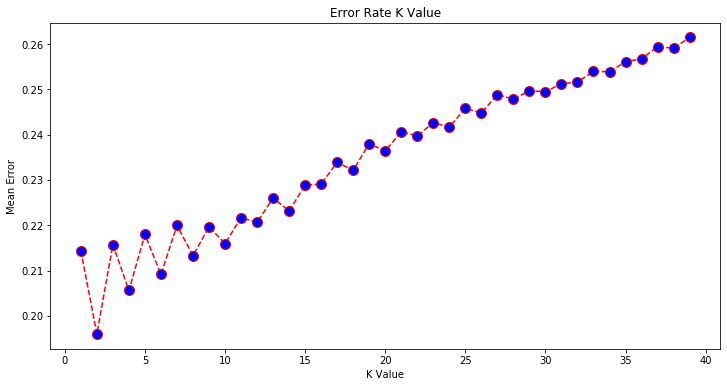

In [119]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 40), error, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

From the result, we can notice that when k eauqls to 2, the KNN can have the best performance (minimum the test error rate). 

In [122]:
model = KNeighborsClassifier(n_neighbors=2,
    weights='uniform',
    algorithm='auto',
    leaf_size=30,
    p=2,
    metric='minkowski')
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.80      0.93      0.86     16731
           1       0.83      0.60      0.70      9907

    accuracy                           0.81     26638
   macro avg       0.81      0.76      0.78     26638
weighted avg       0.81      0.81      0.80     26638



In [95]:
model = DecisionTreeClassifier(criterion='gini',
    splitter='best',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features=None,
    random_state=None,
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    class_weight=None,
    presort='deprecated',
    ccp_alpha=0.0)

pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

pipeline.fit(x_train, y_train)


predictions = pipeline.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.87      0.86     16731
           1       0.77      0.76      0.77      9907

    accuracy                           0.83     26638
   macro avg       0.82      0.81      0.82     26638
weighted avg       0.83      0.83      0.83     26638



In [96]:
model = RandomForestClassifier(n_estimators=100,
    criterion='gini',
    max_depth=None,
    min_samples_split=2,
    min_samples_leaf=1,
    min_weight_fraction_leaf=0.0,
    max_features='auto',
    max_leaf_nodes=None,
    min_impurity_decrease=0.0,
    min_impurity_split=None,
    bootstrap=True,
    oob_score=False,
    n_jobs=None,
    random_state=None,
    verbose=0,
    warm_start=False,
    class_weight=None,
    ccp_alpha=0.0,
    max_samples=None)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])
pipeline.fit(x_train, y_train)

predictions = pipeline.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.86      0.91      0.88     16731
           1       0.83      0.76      0.79      9907

    accuracy                           0.85     26638
   macro avg       0.85      0.83      0.84     26638
weighted avg       0.85      0.85      0.85     26638



In [98]:
model = AdaBoostClassifier(base_estimator=None,
    n_estimators=50,
    learning_rate=1.0,
    algorithm='SAMME.R',
    random_state=None)
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('model', model)])

pipeline.fit(x_train, y_train)


predictions = pipeline.predict(x_test)

print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87     16731
           1       0.84      0.63      0.72      9907

    accuracy                           0.82     26638
   macro avg       0.83      0.78      0.79     26638
weighted avg       0.82      0.82      0.81     26638



The following table shows the results summerizing the value of performance index of each algorithem:

|   | KNN | DT | RF | AdaBoost | XGBoost |
| :--: | :--: | :--: | :--: | :--: | :--: |
| Accuracy | 0.81 | 0.83 | 0.85 | 0.82 | 0.85 |
| Precision | 0.83 | 0.77 |    0.75 | 0.84 | 0.85 |
| Recall | 0.60 | 0.76 | 0.67 | 0.63 | 0.72 |
| F1 Score | 0.70 | 0.77 | 0.71 | 0.72 | 0.78 |


We could conclude that the improvement is not significant before and after we added the new feature. Besides, RF and XGBoost still perform better since the accuracy and f1-score are relatively higher. And around 67% of cancel bookings are retrieved in RF and around 72% cancel bookings are retrieved in XGBoost.


## 9. Conclusion and Limitation

### i. Conclusion

According to  the feature selection of all datasets, “deposit type” have the most significant influence on customer to cancel the booking, which means that the owner of the hotel should take more into consideration the deposit payment of the guest. 

In addtion, the feature importance changed when the entire dataset was splited by hotel type. The city hotels has the similar result as the entire dataset. For resort hotels, the importance of deposit decrease, while lead time and car parking becomes more important than other situation. This can be explained as the fact that resort hotels accept more tourists who travel to Europe, and tourists are often more willing to travel by car, which makes the impact of parking spaces larger than that of city hotels that are more on business trips.

When it comes to the prediction models,  the Random Forest Model and XGBoost Model have better performance on predicting whether the customer will cancel the booking on the entire dataset.

For the divided datasets, models’ performance have improved in the City Hotel dataset. In addition, Random Forest Model and XGBoost Model predicts more accurately.

By adding new variable “Holiday”, model’s performance do not have significant improvement, which means that feature holidays may not have significant influence on cancellation.


### ii. Limitation

Firstly,
Although we have shown that our models achieved good results, using time periods that were not included in the training data, and our models were not deployed in a production environment because this was beyond the scope of our present work.

Another problem is that the time period for this dataset is from 2015 to 2017, which also means that the model we built cannot guarantee a good performance in the future since the model may be highly sensitive to time.

Secondly,
The dataset we used in this project has been cleaned and some features in the original article dataset like hotels’ ID has been removed. As the result, we cannot explore the influence from other factors, Based on the research, the reputation on online booking website can also affect customers’ choice. the hotels and its competitors’ reputation, be analyzed towards NLP method (like emotional analysis) from the online review of each hotels. 

In addition, the weather may also be an important factor affecting hotel cancellation. We tried to crawler the global weather websites (like european climate assessment &dataset, and national centers for environmental information) and try to get the daily information of each country. The problem we face is that there are too many countries in Europe, and each country may have multiple observation stations, which means that it is difficult to describe the weather in a country on average. 

Similarily, we should also take big events into consideration, since big event may have a huge impact on the country’s tourism industry. For example, holding sport events such as the Olympic Games or the World Cup will attract a large number of sports fans or fans to the country to watch the games, which will have a positive impact on the local tourism industry, and the rate of the reservation will also be affected. Take the recent situation as an example, if a country is hit by a wide range of infectious diseases, the number of tourists visiting the local area will be greatly reduced.

## 10. Reference

Liu, P. H., Smith, S., Orkin, E. B., & Carey, G. (2002). Estimating unconstrained hotel demand based on censored booking data. Journal of Revenue and pricing Management, 1(2), 121-138.

Antonio, N., de Almeida, A., & Nunes, L. (2019). Hotel booking demand datasets. Data in brief, 22, 41-49.

Lai, K. K., & Ng, W. L. (2005). A stochastic approach to hotel revenue optimization. Computers & Operations Research, 32(5), 1059-1072.